### Why Clustering?

Clustering is a powerful tool for grouping similar houses based on their features. By uncovering patterns in the data, we can identify different "types" of homes within the market, even without labels. This analysis allows us to make more informed business decisions by understanding the natural divisions within our data.

### Expected Insights

With clustering, we hope to reveal meaningful groups of houses that share similar characteristics—like size, number of bedrooms, and location factors that may be impacting sale prices. Here’s how clustering can influence business decisions:

1. **Identifying High-Value Segments**
   - By grouping houses, we can identify clusters that correlate with higher sale prices. Understanding what makes these homes desirable (e.g., neighborhood, design, or amenities) can help inform decisions about renovations or targeted marketing strategies.

2. **Cost Optimization Opportunities**
   - Clustering can reveal features that contribute the most to cost. If certain clusters are consistently lower in value but carry high costs, we can explore ways to reduce costs in those segments without affecting buyer interest.

3. **Targeted Marketing and Pricing**
   - Each cluster may represent a distinct market segment, allowing for tailored marketing and pricing strategies. For example, homes in a "luxury" cluster can be marketed and priced differently than those in a "starter" cluster, aligning with different buyer types.

4. **Improving Decision-Making**
   - Clustering supports various business decisions, from determining which features to prioritize in upgrades to structuring pricing strategies across different home types.

### Business Impact

By grouping the data through clustering, we aim to uncover hidden structures that can help optimize costs and maximize sale prices across various home types. This segmentation approach enables a more strategic focus on both increasing value and reducing unnecessary expenses.


### 1. Import Data

In [2]:
# required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
file_path = 'scaled_housing_data.csv'
data = pd.read_csv(file_path)
data.head()

,ovl_quality,grlivarea,totalbsmtsf,garagecars,year_constructed,area_lot,bsmtfinsf1,ovl_condition
0,5,6.733402,672,0,1930,4388,116,7
1,7,7.124478,1242,2,1973,9600,916,6
2,4,6.562444,420,0,1940,5330,280,7
3,4,7.191429,686,1,1925,9906,0,4
4,8,7.409742,1600,2,2008,5587,1480,5


### 2- Finding the Optimal Number of Clusters (k)

Choosing the right number of clusters is crucial for the K-Means algorithm to perform effectively. An incorrect value for \( k \) can lead to poor clustering and misinterpretation of the data. In this section, we will explore two common methods to determine the optimal value of \( k \):

1. **Elbow Method**: This method involves plotting the Within-Cluster Sum of Squares (WCSS) against different values of \( k \). The "elbow" point, where the rate of decrease sharply changes, indicates the optimal number of clusters.

2. **Silhouette Score**: This method evaluates how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

Let's proceed with these methods to find the best value for \( k \).


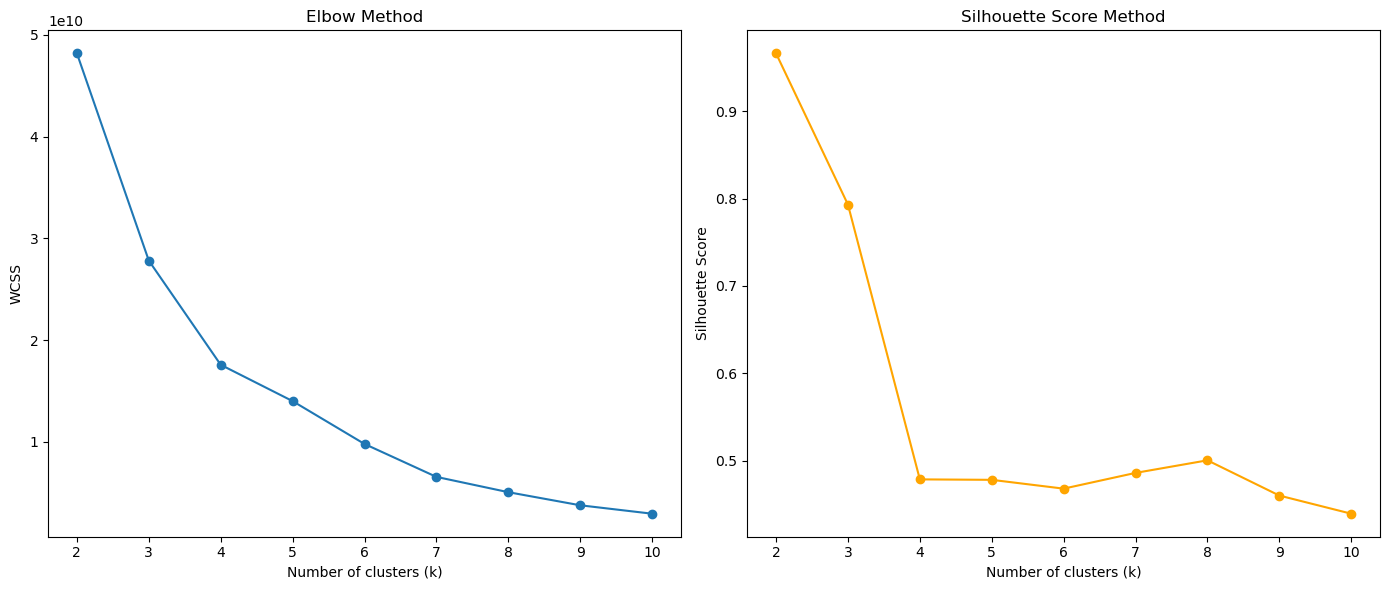

In [6]:
k_values = range(2, 11)  # Test from 2 to 10 clusters
wcss = []  # Store WCSS values
silhouette_scores = []  # Store silhouette scores

# K-Means clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)  # Scale features DataFrame

    # Append WCSS and calculate silhouette score
    wcss.append(kmeans.inertia_)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Elbow Method and Silhouette Scores
plt.figure(figsize=(14, 6))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')

# Silhouette Score Method
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [44]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data)

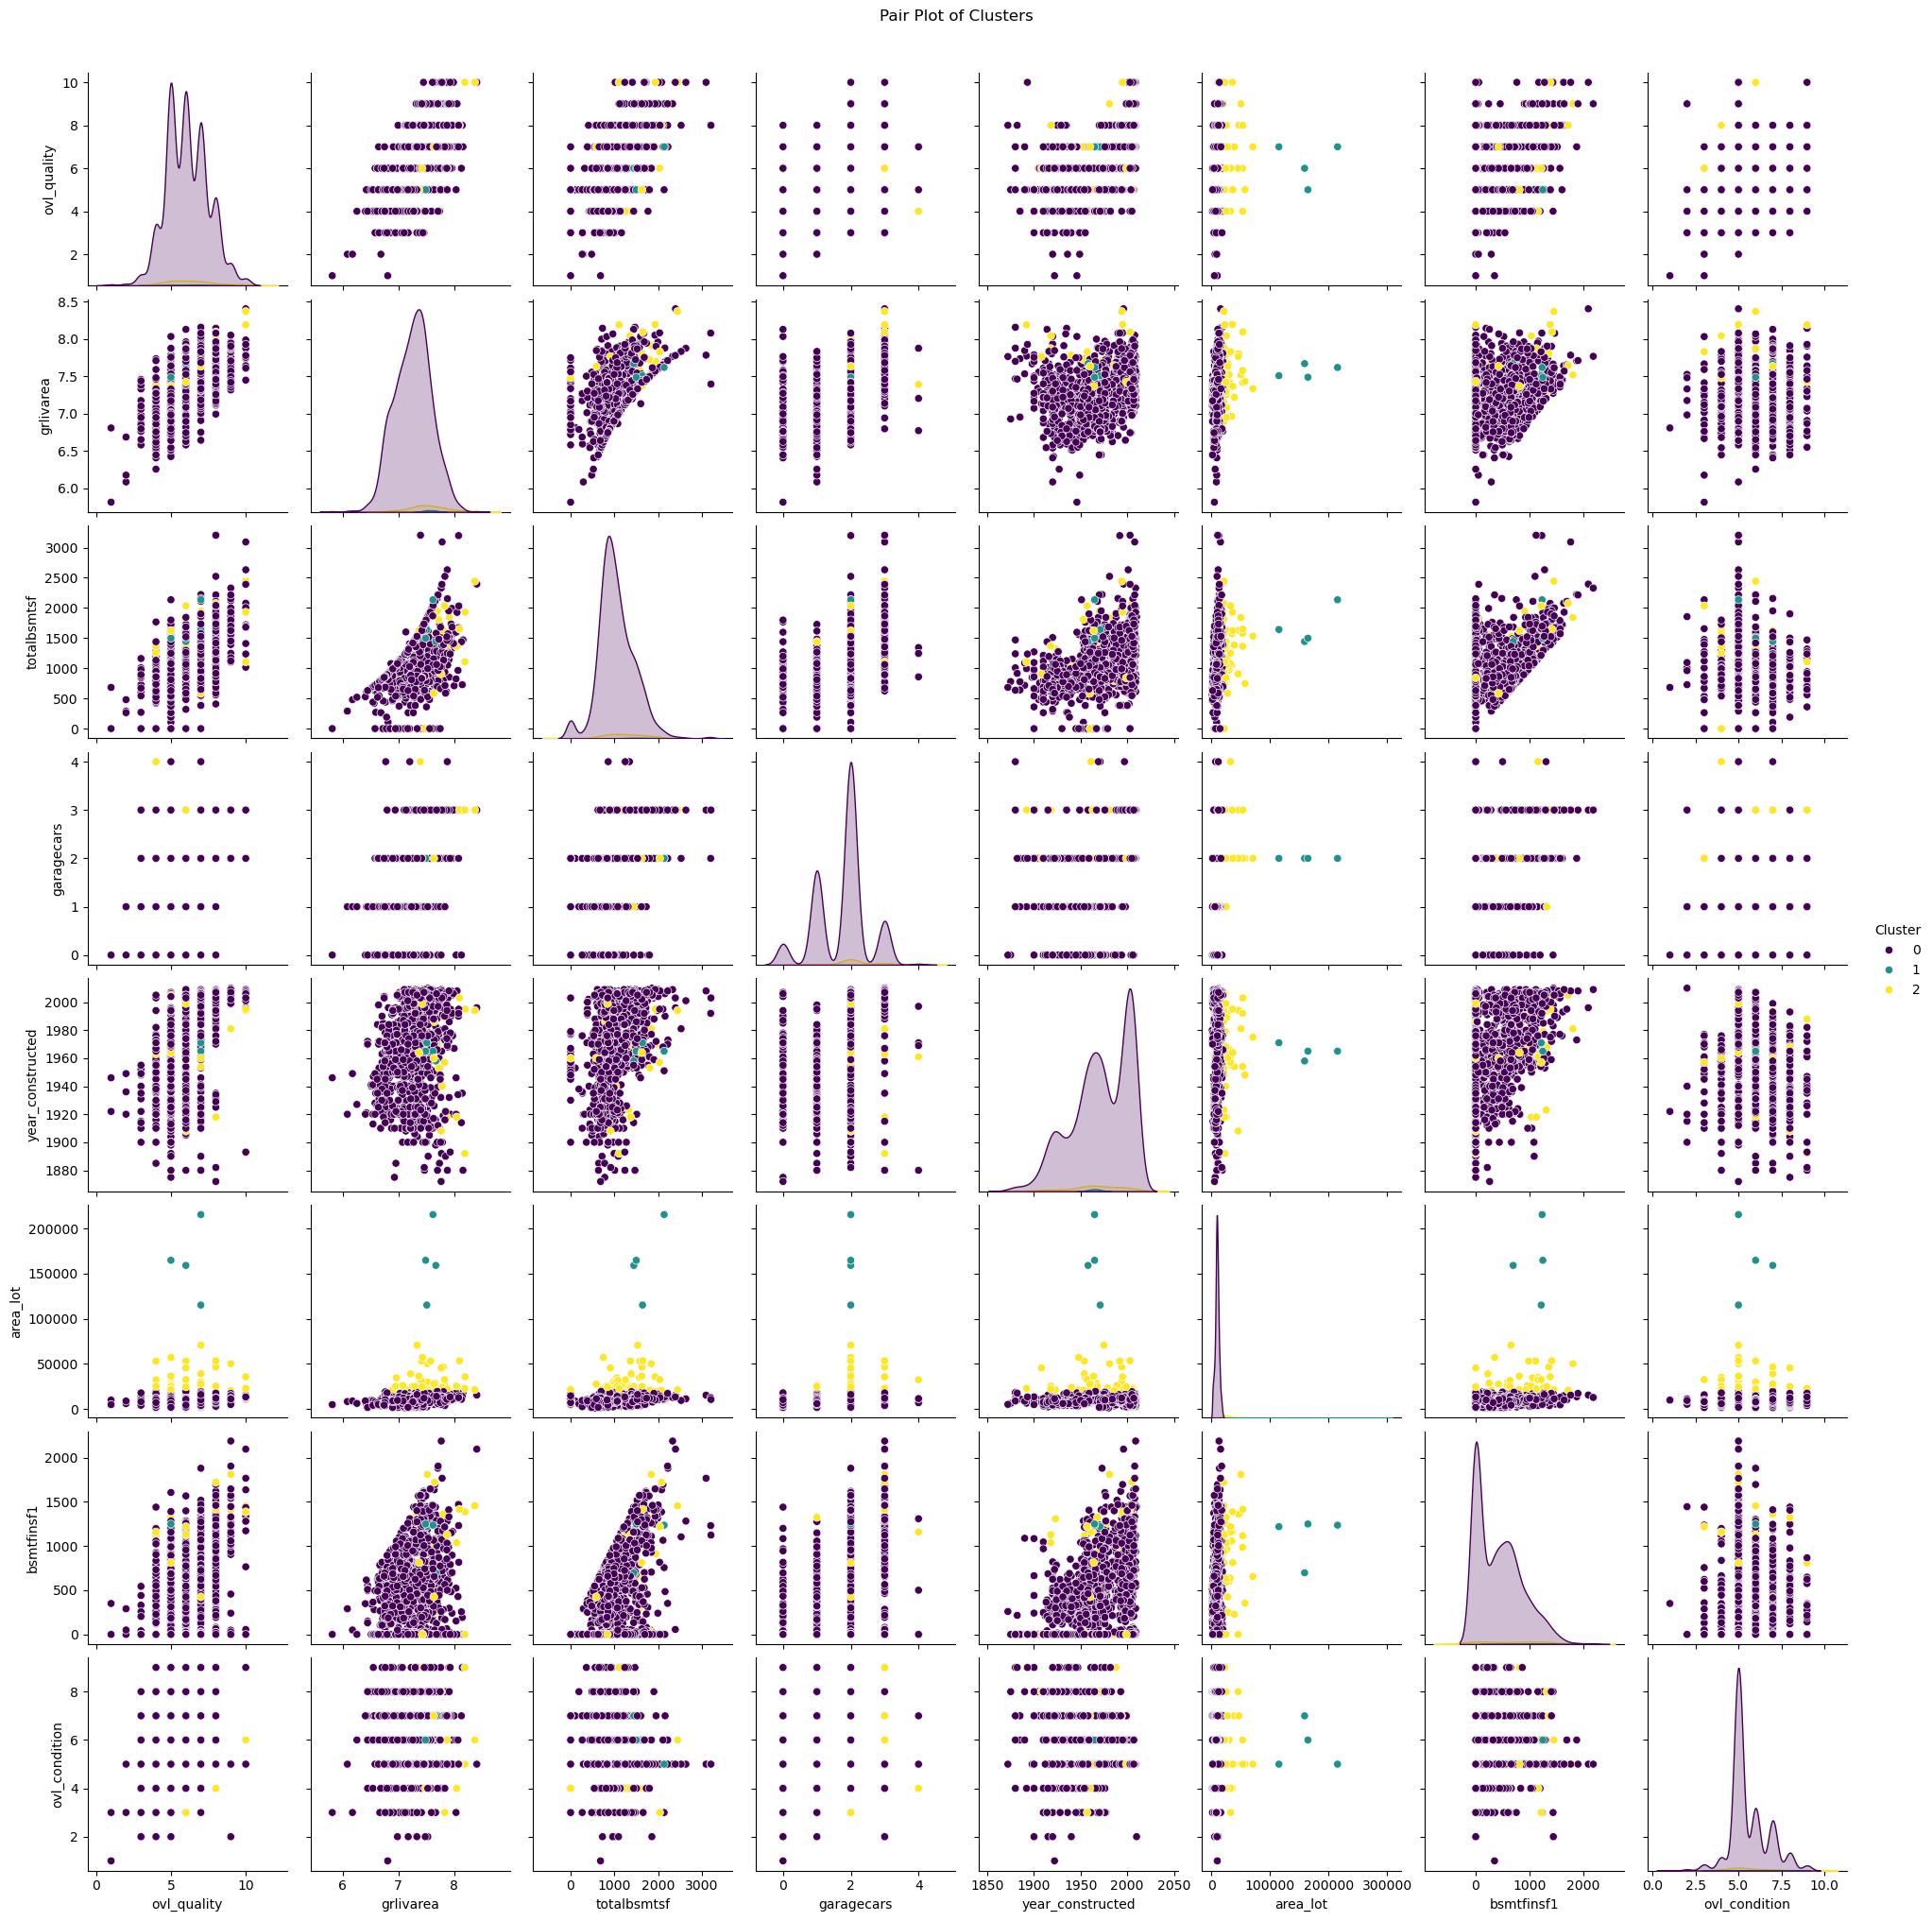

In [52]:
feature_names = ['ovl_quality',	'grlivarea',	'totalbsmtsf',	'garagecars',	'year_constructed',	'area_lot',	'bsmtfinsf1',	'ovl_condition']


# Add cluster labels to the DataFrame
data ['Cluster'] = cluster_labels

# Create pair plot
sns.pairplot(data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

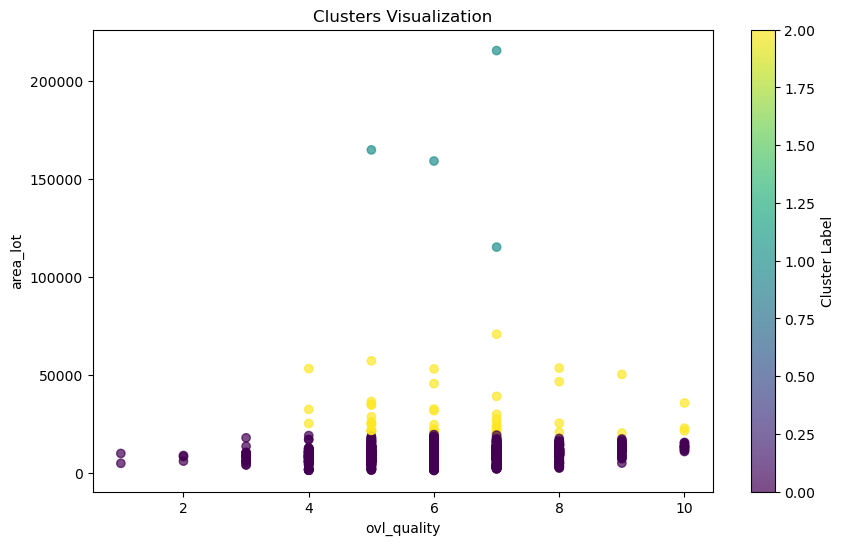

In [62]:
feature1_index = 0  # ovl_quality
feature2_index = 5  # area_lot

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:, feature1_index], data.iloc[:, feature2_index], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('Clusters Visualization')
plt.xlabel(f'ovl_quality')  # Displaying feature numbers as 1-indexed
plt.ylabel(f'area_lot')
plt.colorbar(label='Cluster Label')
plt.show()

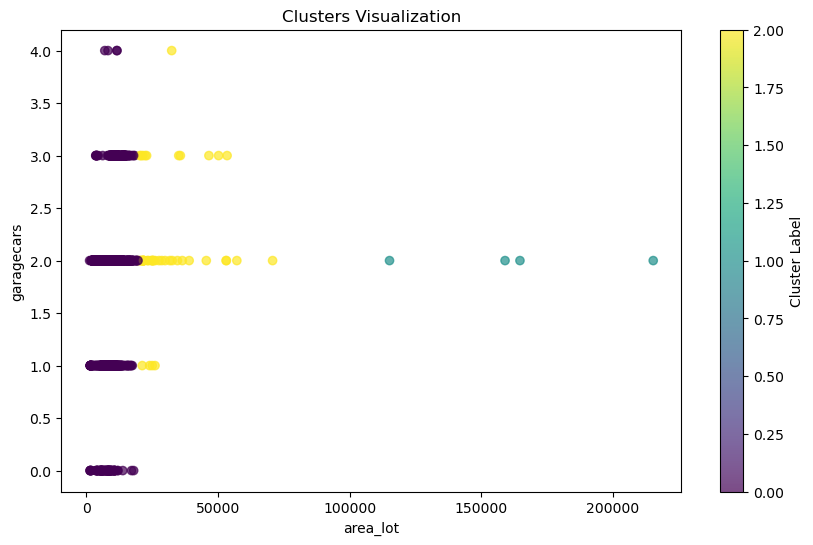

In [64]:
feature1_index = 5  # area_lot
feature2_index = 3  # garagecars

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:, feature1_index], data.iloc[:, feature2_index], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('Clusters Visualization')
plt.xlabel(f'area_lot')  # Displaying feature numbers as 1-indexed
plt.ylabel(f'garagecars')
plt.colorbar(label='Cluster Label')
plt.show()

In [58]:
# Import necessary libraries
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Silhouette Score
sil_score = silhouette_score(data, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")



Silhouette Score: 0.7930


In [60]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(data, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 0.4716
